In [ ]:
#linear algebra,data preprocessing,Csv files
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for data cleaning
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import requests
from pprint import pprint

#for spacy 
from spacy.lang.en import English
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS




#for feature selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#evalution metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


#for clustering 
from sklearn.cluster import KMeans

In [ ]:

headers = {"Authorization": "Api-Key pnOscX2f.Q48hIMJw3MFjDvJbqXza1WPdIcww0AHm"}
res = requests.get('http://157.230.202.235:8001/api/obs/events/', headers=headers)
data = res.json()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:

pprint(data['events'])

Streaming output truncated to the last 5000 lines.
               'monitoring center.", "top_image": '
               '"http://img2.chinadaily.com.cn/images/202105/10/6098e004a31024adbdc6ee1c.jpeg", '
               '"movies": []}',
  'search_source': 21,
  'source_link': 'https://www.chinadaily.com.cn/a/202105/10/WS6098e004a31024ad0babcfe0.html',
  'tags_list': '[]',
  'updated_at': '2021-05-12T10:50:05.640922Z'},
 {'address': None,
  'classified_category': None,
  'geolocation': None,
  'has_media': False,
  'id': 571159,
  'is_analyzed': False,
  'media_link': None,
  'meta_json': '{"url": '
               '"https://www.chinadaily.com.cn/a/202105/07/WS6094b128a31024ad0babc7d8.html", '
               '"authors": [], "publish_date": "2021-05-07 00:00:00", "text": '
               '"Children look on as an historical photo is recreated showing '
               'the Eighth Route Army soldiers based in Wuxiang county, Shanxi '
               'province, in the 1940s during the War of Resis

In [ ]:
texts =[]

for val in data['events']:
  try:
    val_dict =json.loads(val['meta_json'])
    texts.append(val_dict['text'])
  except:
    print("soemthing is wrong")
    pass

  
  # print(val_dict.keys(), val_dict['text'])
  # texts.append(val_dict['text'])

soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is

In [ ]:
texts

['When Voyager-1 was launched on September 5, 1977, the team that worked on the probe had no idea that even after four decades, the spacecraft would still be sending critical data pings and that too from beyond the Solar System. Now in interstellar space, the area beyond the magnetic bubble inflated by our Sun, Voyager\'s data is revealing what that new frontier is like.\n\nA study published in Nature Astronomy reports what may be the first continuous measurement of the density of material in interstellar space. “This detection offers us a new way to measure the density of interstellar space and opens up a new pathway for us to explore the structure of the very nearby interstellar medium,” said Stella Ocker, a Ph.D. student at Cornell University and part of the Voyager team.\n\nThe Voyager mission crossed the heliosphere’s (the bubble formed by our Sun) boundary on August 25, 2012, becoming the first human-made object to enter and measure interstellar space. While the new measurements 

In [ ]:
df = pd.DataFrame(texts,columns=['text'])
df.head()

text
0  When Voyager-1 was launched on September 5, 19...
1  An “incredible deep sea fish” with teeth as sh...
2  On May 9, Manimegalai, mother of Venkat Prabhu...
3  Reading to children should not be a chore. But...
4  One story dominated not just the Middle East a...

In [ ]:
df.shape

(954, 1)

In [ ]:
len(df[df['text'] == ""])

319

In [ ]:
df.loc[df['text'] == "", 'text'] = np.nan
df1 =df.dropna(subset=['text'],axis=0)
len(df1[df1['text'] == ""])
df1 = df1.reset_index()

In [ ]:
df1.head()

index                                               text
0      0  When Voyager-1 was launched on September 5, 19...
1      1  An “incredible deep sea fish” with teeth as sh...
2      2  On May 9, Manimegalai, mother of Venkat Prabhu...
3      3  Reading to children should not be a chore. But...
4      4  One story dominated not just the Middle East a...

In [ ]:
df1.shape

(635, 2)

In [ ]:

from gensim.models import Word2Vec
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# list of punctuation marks
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

nlp = spacy.load('en')
nlp.max_length = 15000000


def process_text(data):

    master = []
    for text in data:
        print(text)
        doc = nlp(text)
        slave = []
        for token in doc:
            
            if not token.is_stop and not token.is_punct:
                if not token.like_num:
                    
                    slave.append(token.lemma_.lower().replace('\n',''))
        master.append(' '.join(slave))

    return master


result = [spacy_tokenizer(i) for i in df1['text']]
result

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(result, min_count=1)

In [ ]:
X= model.wv.vocab
len(X)

In [ ]:
X = list(X)
X

In [ ]:
def vectorize(list_of_sents,model):

#generating vectors for each sentences by averaging its word vectors.
  features = []

  for tokens in list_of_sents:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for token in tokens:
      if token in model.wv:
        try:
          vectors.append(model.wv[token])
        except KeyError:
          continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      features.append(avg_vec)
    else:
      features.append(zero_vector)
  return features
    
vectorized_docs = vectorize(result,model=model)
len(vectorized_docs), len(vectorized_docs[0])

(635, 100)

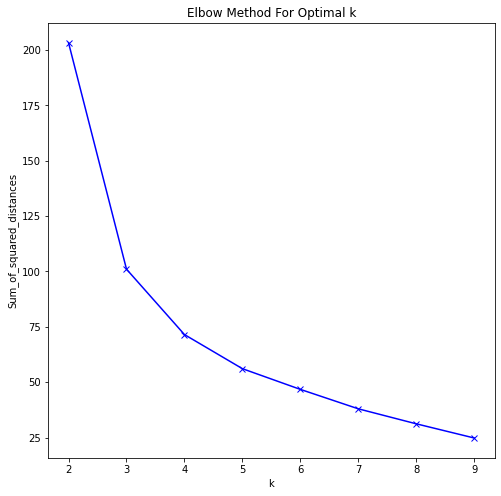

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(vectorized_docs)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
n_clusters = 4
clf= KMeans(n_clusters=n_clusters,init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
prediction = clf.fit_predict(vectorized_docs)
labels = clf.labels_


In [ ]:

article_cl=pd.DataFrame(list(zip(df['text'],prediction)),columns=['title','cluster'])
print(article_cl.sort_values(by=['cluster']))

                                                 title  cluster
0    When Voyager-1 was launched on September 5, 19...        0
394  The most important economic report, since the ...        0
391  Six Flags, the operator of Frontier City theme...        0
387                                                NaN        0
384  El excomandante de la Policía Departamental de...        0
..                                                 ...      ...
144  Eid-ul-Fitr is certainly one of the most impor...        3
216                                                NaN        3
320  Tras la negativa del presidente Luis Arce Cata...        3
585  SINGAPORE: A 27-year-old woman has died after ...        3
446                                                NaN        3

[635 rows x 2 columns]


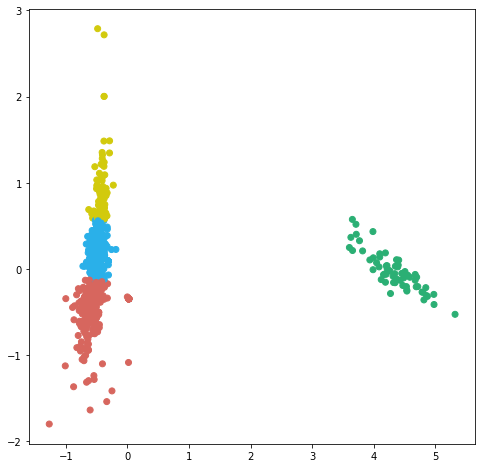

In [ ]:
from sklearn.decomposition import PCA

pca =PCA(n_components=4).fit(vectorized_docs)
coords = pca.transform(vectorized_docs)
label_colors = ['#2AB0E9','#2BAF74','#D7665E','#D2CA0D','#522A64','#A3DB05','#FC6514','#C7549F','#58C754','#C75459']
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0],coords[:,1],c=colors)
centriods =clf.cluster_centers_
# centriod_coords =pca.transform(centriods)
# plt.scatter(centriod_coords[:,0],centriod_coords[:,1],marker='X',s=200, linewidths=1,c='#444d61')
plt.show()

In [ ]:
cluster_df = pd.DataFrame([result , labels]).T
cluster_df.columns = ['clean_text' ,'label' ]
cluster_df[:5]

clean_text label
0  [When, Voyager-1, launch, September, 5, 1977, ...     0
1  [An, “, incredible, deep, sea, fish, ”, tooth,...     3
2  [On, May, 9, Manimegalai, mother, Venkat, Prab...     0
3  [Reading, child, chore, But, pleasure, child, ...     2
4  [One, story, dominate, Middle, East, North, Af...     0

In [ ]:
combined_df = pd.concat([df1 , cluster_df] , axis = 1)
combined_df[:5]

In [ ]:
combined_df[combined_df['label']== 0].values

array([[13.0,
        'Escucha esta nota aquí\n\nJoe Biden llegó a la Casa Blanca con la esperanza de evitar enredarse en el conflicto entre Israel y los palestinos.\n\n\n\nPero, como ocurrió con sus antecesores en la presidencia de Estados Unidos, una crisis lo está arrastrando antes de lo que hubiera querido.\n\n\n\nEl estallido de violencia israelo-palestina coloca a Biden en una posición incómoda, tanto diplomáticamente como dentro de Estados Unidos, donde el ala izquierda de su Partido Demócrata critica cada vez más a un Israel que contó con el entusiasta apoyo del expresidente Donald Trump.\n\n\n\n"Se puede apreciar que la administración Biden ve esto como una empresa de bajo valor y poco retorno, plagada de riesgos políticos", dijo Aaron David Miller, un negociador estadounidense de larga data para Medio Oriente.\n\n\n\n"No hay perspectiva de éxito en este tema. No hay líderes en ninguna de las dos partes que estén dispuestos a tomar decisiones", agregó Miller, ahora en Carnegie

In [ ]:
combined_df[combined_df['label']== 1].values

array([[0.0,
        'When Voyager-1 was launched on September 5, 1977, the team that worked on the probe had no idea that even after four decades, the spacecraft would still be sending critical data pings and that too from beyond the Solar System. Now in interstellar space, the area beyond the magnetic bubble inflated by our Sun, Voyager\'s data is revealing what that new frontier is like.\n\nA study published in Nature Astronomy reports what may be the first continuous measurement of the density of material in interstellar space. “This detection offers us a new way to measure the density of interstellar space and opens up a new pathway for us to explore the structure of the very nearby interstellar medium,” said Stella Ocker, a Ph.D. student at Cornell University and part of the Voyager team.\n\nThe Voyager mission crossed the heliosphere’s (the bubble formed by our Sun) boundary on August 25, 2012, becoming the first human-made object to enter and measure interstellar space. While t

In [ ]:
combined_df[combined_df['label']== 2].values

array([[1.0,
        "An “incredible deep sea fish” with teeth as sharp as glass washed up ashore on a beach in California last week. The black fish, which appears rather frightening at first glance, laid on the sand on the shore of Crystal Cove State Park's Marine Protected Area in Laguna Beach last Friday.\n\nIn a post on Facebook, Crystal Cove State Park shared pictures of the fish and other details after the rare creature was spotted. It is most likely the Pacific Football Fish, the post said, adding that their teeth are transparent, “like pointed shards of glass.”\n\n“Last Friday morning an incredible deep sea fish washed up on shore in Crystal Cove State Park’s Marine Protected Area (MPA). There are more than 200 species of angler fish worldwide and this particular fish is most likely the Pacific Football Fish. Only females possess a long stalk on the head with bioluminescent tips used as a lure to entice prey in the darkness of waters as deep as 3,000 feet! Their teeth, like poi

In [ ]:
combined_df[combined_df['label']== 3].values

array([[3.0,
        'Reading to children should not be a chore. But the pleasure a child gets from a book is lost if they do not understand the language.\n\nIt’s a problem faced by parents worldwide, not least in Arabic, where children’s books are written in a formal standard so distinct from their spoken tongue. But a handful of pioneers are now making headway.\n\nRiham Shendy, 45, started translating popular English-language storybooks into Egyptian Arabic after she had her twins, Ali and Leila, in 2013. An economist by profession and with a PhD in Applied Economics, she was working at the World Bank in Washington DC when she and her German husband, Steffen Reichold, decided to teach their son and daughter their respective mother tongues.\n\nSome popular children’s books have been translated into classical Arabic, like Julia Donaldson’s The Gruffalo and The Very Hungry Caterpillar, by Eric Carle. But it is rare to find them in a’amiya, the commonly spoken dialects of the language: e

In [ ]:
# combined_df[combined_df['label']== 4].values

In [ ]:
# combined_df[combined_df['label']== 5].values

In [ ]:
# combined_df[combined_df['label']== 6].values

In [ ]:
# combined_df[combined_df['label']== 7].values

In [ ]:
# combined_df[combined_df['label']== 8].values

In [ ]:
# combined_df[combined_df['label']== 9].values

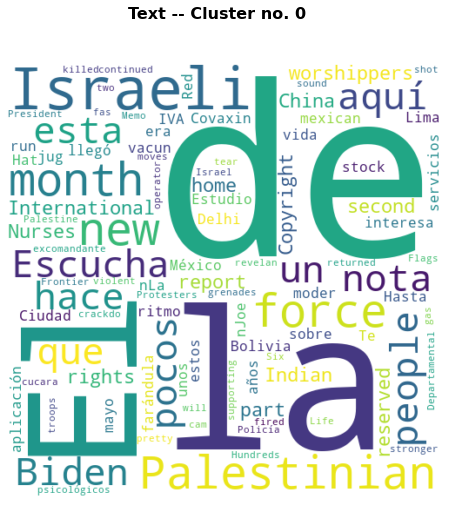

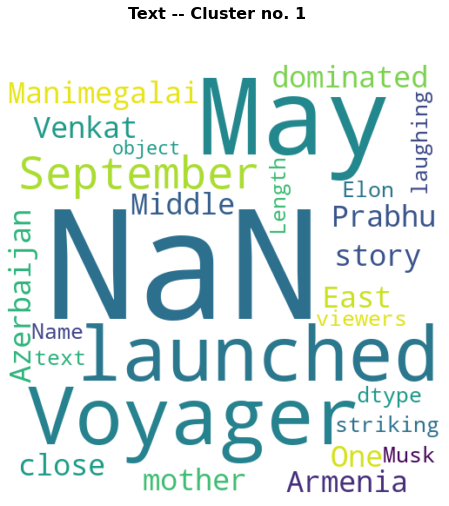

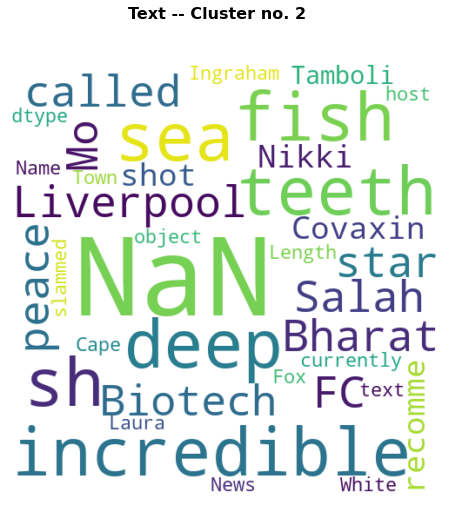

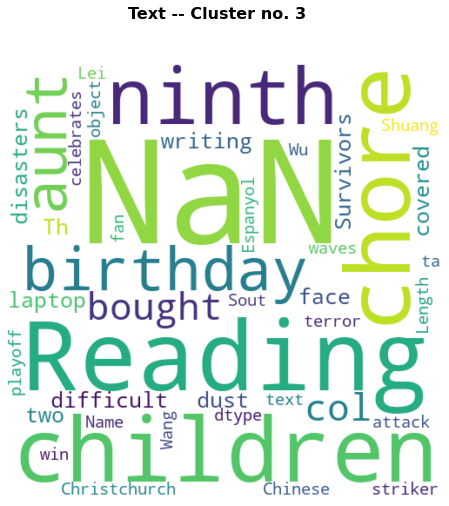

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
yearss = ['0','1','2','3']
for x in yearss:
  y = int(x)
  wordcloud.generate(str(combined_df.query('label == @y')['text']))
  plt.rcParams['figure.figsize'] = (8,8)
  plt.axis('off')
  plt.suptitle('Text -- Cluster no. {}'.format(x), fontsize=16, fontweight='bold')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.show()

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(clf, 'finalmodel.pkl')
  
# Load the model from the file
M1 = joblib.load('finalmodel.pkl') 